In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [32]:
df = pd.read_csv('Mid_lane.csv')
mid_lane = df.drop(columns = ['Lane', 'Unnamed: 0', 'Summoner', 'Item_0', 'Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6'])

In [33]:
mid_lane.head()

,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
0,68,6,5,4,3,2,14191,3752,1261,14453,8971,13,3,20,10
1,4,4,8,8,0,1,11247,1189,1189,16810,8966,13,2,17,25
2,163,7,11,2,5,2,31819,8187,1330,27564,12303,16,3,19,29
3,39,4,7,3,2,1,12736,4893,2905,27526,10424,14,2,18,10
4,27,1,2,9,0,1,8928,7027,7027,15858,8566,13,1,13,19


In [34]:
mid_lane.groupby('Champion').mean().head()

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
Champion,,,,,,,,,,,,,,
1,5.487252,5.065156,7.164306,2.776204,1.396601,16766.685552,4366.983003,2312.303116,16504.419263,10577.660057,14.189802,2.087819,20.288952,22.331445
2,5.885714,5.400000,6.714286,2.857143,1.342857,16219.942857,7608.342857,4086.971429,24922.542857,11336.714286,14.514286,2.342857,18.685714,14.114286
3,5.543353,4.508671,9.289017,3.179191,1.612717,16301.751445,4762.421965,2350.601156,18591.520231,10686.398844,14.468208,4.011561,29.416185,29.271676
4,4.722623,4.991576,8.179302,2.439832,1.264741,15485.406739,7604.408544,4221.448857,18795.455475,12032.704573,14.640193,2.908544,22.395909,31.447052
5,11.875000,3.750000,5.625000,8.000000,2.000000,24034.625000,36552.500000,3514.625000,29575.875000,14728.125000,16.125000,3.750000,30.125000,18.250000


In [35]:
model = KMeans(n_clusters = 4).fit(mid_lane)

In [37]:
model.cluster_centers_

array([[1.42619088e+02, 3.74264541e+00, 4.50509769e+00, 5.88641365e+00,
        1.99375702e+00, 1.19865259e+00, 1.13719959e+04, 3.61643113e+03,
        1.93106252e+03, 1.43080464e+04, 8.98498819e+03, 1.30448237e+01,
        2.91089153e+00, 2.16563665e+01, 1.66674152e+01],
       [1.34688582e+02, 1.15829498e+01, 7.14179268e+00, 1.01571335e+01,
        4.86653517e+00, 1.95748411e+00, 3.59578895e+04, 1.21971545e+04,
        4.73826781e+03, 3.46656103e+04, 1.66547633e+04, 1.72813938e+01,
        2.95923734e+00, 3.00355030e+01, 2.44394039e+01],
       [1.36889366e+02, 6.55052564e+00, 6.54301652e+00, 7.46198956e+00,
        2.98469570e+00, 1.52027462e+00, 1.97619605e+04, 4.72871415e+03,
        2.28743217e+03, 2.46881872e+04, 1.19105165e+04, 1.51398126e+01,
        2.94257312e+00, 2.40331832e+01, 2.03421297e+01],
       [1.35480116e+02, 8.30232558e+00, 3.89982111e+00, 8.33053530e+00,
        4.73579194e+00, 1.82262282e+00, 2.19809368e+04, 1.49512952e+04,
        6.85872822e+03, 1.79286981e+0

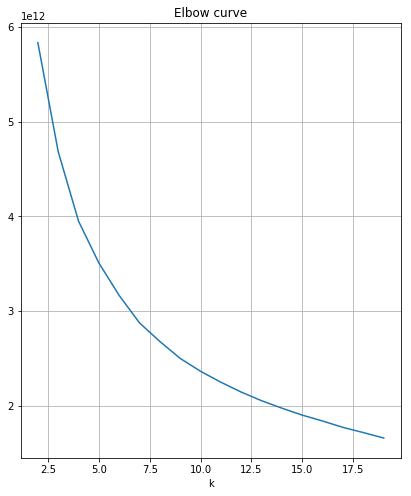

In [40]:
distorsions = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(mid_lane)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 20), distorsions)
plt.grid(True)

In [43]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(mid_lane)
    silhouette_avg = metrics.silhouette_score(mid_lane, cluster_labels)
    silhouette_plot.append(silhouette_avg)

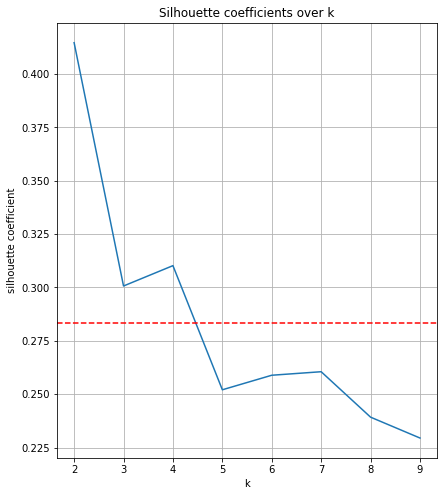

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [61]:
k_means = KMeans(n_clusters = 5).fit(mid_lane.groupby('Champion').mean())
cluster_assignments = k_means.predict(mid_lane.groupby('Champion').mean())

In [62]:
cluster_assignments

array([0, 1, 1, 0, 3, 1, 1, 2, 4, 0, 3, 4, 0, 1, 0, 4, 0, 0, 2, 0, 0, 2,
       1, 4, 4, 1, 1, 0, 0, 1, 4, 1, 1, 2, 4, 1, 1, 4, 0, 0, 4, 4, 0, 2,
       1, 0, 4, 4, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 4, 0, 1, 1, 0, 4, 4, 0, 2, 0, 2, 1, 1, 1,
       0, 4, 0, 1, 1, 0, 4, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 4, 0, 3, 0, 1, 0, 0, 2, 1, 1, 2, 4, 0, 4, 4, 2, 3,
       0, 4, 4, 0, 2, 1, 0, 1], dtype=int32)

In [64]:
clustered = mid_lane.groupby('Champion').mean()

In [65]:
clustered['Cluster'] = cluster_assignments

In [67]:
clustered

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Cluster
Champion,,,,,,,,,,,,,,,
1,5.487252,5.065156,7.164306,2.776204,1.396601,16766.685552,4366.983003,2312.303116,16504.419263,10577.660057,14.189802,2.087819,20.288952,22.331445,0
2,5.885714,5.400000,6.714286,2.857143,1.342857,16219.942857,7608.342857,4086.971429,24922.542857,11336.714286,14.514286,2.342857,18.685714,14.114286,1
3,5.543353,4.508671,9.289017,3.179191,1.612717,16301.751445,4762.421965,2350.601156,18591.520231,10686.398844,14.468208,4.011561,29.416185,29.271676,1
4,4.722623,4.991576,8.179302,2.439832,1.264741,15485.406739,7604.408544,4221.448857,18795.455475,12032.704573,14.640193,2.908544,22.395909,31.447052,0
5,11.875000,3.750000,5.625000,8.000000,2.000000,24034.625000,36552.500000,3514.625000,29575.875000,14728.125000,16.125000,3.750000,30.125000,18.250000,3
6,6.590909,4.500000,4.727273,3.363636,1.590909,16343.363636,8091.068182,3566.386364,21173.909091,11070.954545,14.613636,1.772727,20.954545,19.750000,1
7,6.330357,4.742857,6.440179,3.398214,1.418750,17359.685714,3416.362500,1990.055357,19541.478571,10509.323214,14.297321,3.129464,22.041071,14.961607,1
8,6.189084,4.539961,6.174464,3.170565,1.615984,20837.777778,7084.361598,3301.088694,27639.857700,11593.042885,14.933723,2.353801,19.665692,3.766082,2
9,3.708333,7.833333,9.562500,1.958333,1.166667,12942.458333,2587.104167,1177.958333,17200.125000,8833.791667,12.791667,6.625000,46.541667,79.604167,4
